In [2]:
import numpy as np
import matplotlib.pyplot as plt

Positional Encoding
---------------------------------------

The positional encoding is added to the classic embedding to get information about the position of a given token in the sequence. It is used at the beginning of the Transformer's encoder and decoder concurrent networks. 

The purpose is to variate the position of the unique point taken by the token on embedding dimensions. However, the variation is not too significant, and it restrains within somehow a circle space. Let us make a small example with an embedding with two dimensions.


(0.0, 0.3)

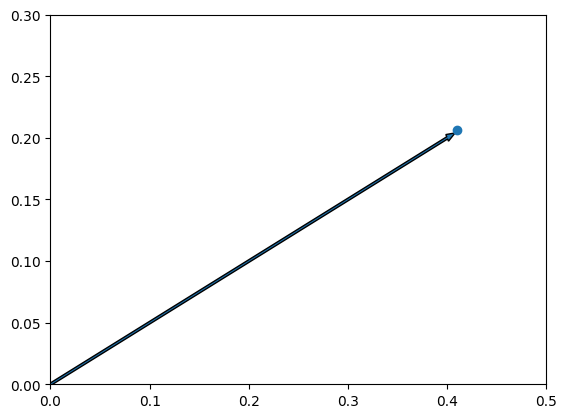

In [43]:
# let's say we have the following embedding vector
vector = np.array([0.4, 0.2])

# let's trace the given point in 2D plan
plt.arrow(0, 0, vector[0] - 0.0001, vector[1], width = 0.002)
plt.scatter(vector[0]+0.01, vector[1]+0.006)
plt.xlim(0, 0.5)
plt.ylim(0, 0.3)

From the Euler formula, we can define the different movements that the point can make within a circle:

$$
euler\_formula(c, gamma) = |c|.\exp^{i \times gamma}
$$

Where c is the distance from the point, and gamma is the angle between the original vector and the one obtained after taking the movement. We can rewrite the Euler formula with the cosinus and the sinus functions:

$$
euler\_formula(c, gamma) = |c|.(\cos(\gamma) + i \sin(\gamma))
$$

Go to the following link for more explanations: [complex_numbers_for_fourier_transform](https://github.com/Oumar199/audio_processing_d_dive/blob/master/complex_numbers_magnitude_phase_extraction.ipynb)



Then we obtain the following space for our embedding vector.

In [66]:
euler = lambda c, gamma: np.abs(c) * (np.cos(gamma) + 1j * np.sin(gamma))

# let's add a minimal c distance from the original point
c = 0.01

# let's create the different angles
gammas = np.linspace(0, 2*np.pi, 100)

# let's get the complex number that we obtain with the euler formula
complex_circle = euler(c, gammas)

# we can obtain, then, the coordinates of our circle by taking the real part as the x-axis coordinate (cos) and imaginary
# as the y-axis coordinate (sin)
x = np.real(complex_circle)

y = np.imag(complex_circle)

# we can then trace the space with respect to the embedding vector
points1 = x + vector[0]

points2 = y + vector[1]


Let us trace below the space of our embedding vector.

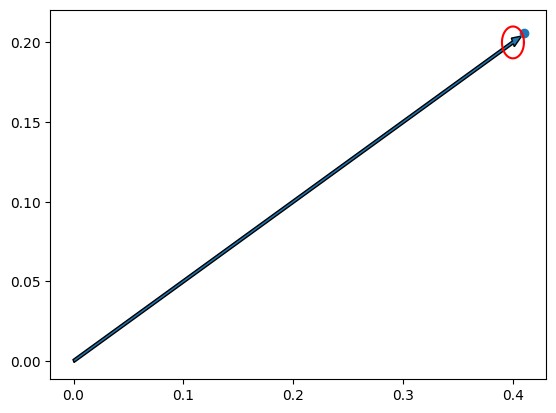

In [68]:
# let's trace the given point in 2D plan
plt.arrow(0, 0, vector[0] - 0.0001, vector[1], width = 0.002)
plt.scatter(vector[0]+0.01, vector[1]+0.006)
# plt.xlim(0, 0.5)
# plt.ylim(0, 0.3)

plt.plot(points1, points2, color = "red")

The embedding vector cannot move out of the red circle. A position it takes in the circle determines its position in the sequence.

If we have another embedding, it will have the same space but at a different location in the original space. We specify a new positional space according to the embedding vector.

Example of two different positional spaces for two different embedding vectors.

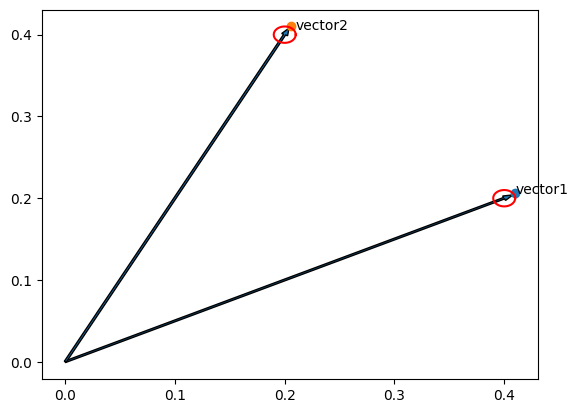

In [73]:
# let's say we have the following embedding vector
vector1 = np.array([0.4, 0.2])
vector2 = np.array([0.2, 0.4])

# let's trace the given point in 2D plan
plt.arrow(0, 0, vector1[0] - 0.0001, vector1[1], width = 0.002)
plt.scatter(vector1[0]+0.01, vector1[1]+0.006)
plt.annotate("vector1", (vector[0]+0.01, vector[1]+0.006))

plt.arrow(0, 0, vector2[0] - 0.0001, vector2[1], width = 0.002)
plt.scatter(vector2[0]+0.006, vector2[1]+0.01)
plt.annotate("vector2", (vector2[0]+0.01, vector2[1]+0.006))
# plt.xlim(0, 0.5)
# plt.ylim(0, 0.3)

# we can then trace the space with respect to the embedding vectors
points1_1 = x + vector1[0]

points2_1 = y + vector1[1]

points1_2 = x + vector2[0]

points2_2 = y + vector2[1]

# trace the positional spaces
plt.plot(points1_1, points2_1, color = "red")

plt.plot(points1_2, points2_2, color = "red")


#### Positional encoding algorithm

The movement made by the embedding vector in the positional space depends on two variables:

- The position of the token for which we determined the embedding vector in the sequence of words
- The number of dimensions of the embedding vector  

Let us say we obtain multiple dimensions for the embedding vector and that we want to create a positional vector to move into the positional space, so we must define an angle and a distance for each possible position and given dimensions. Then, suppose that the embedding vector is of dimension 512; we will need to define at each 2 dimensions the x coordinate and y coordinate, which will be the cosinus and the sinus of an angle from the vector origin. However, the movements of the embedding vector will be languid to obtain a different positional vector value for multiple dimensions of our embedding vector. Let us do some examples below to explain that: 

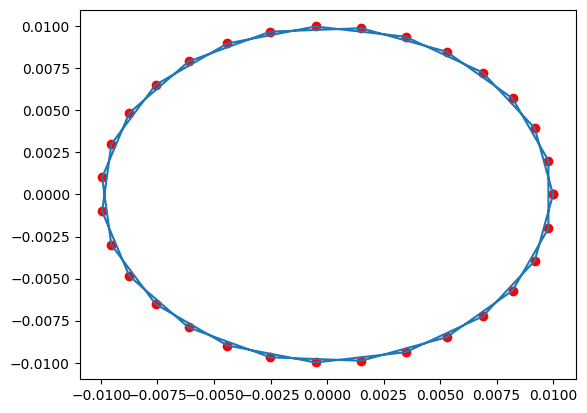

In [78]:
# let's say we want to obtain the different values of our positional vector with as number of 
# dimensions 64 we will have then 64 / 2 points in our positional space. 

# let's take big angles
bg_angles = np.linspace(0, 4 * np.pi, 32)

# let's take the different possible points (we will take a fix distance in that example)
points = euler(c, bg_angles)

# let's trace the points without taking in account the embedding vector
plt.plot(np.real(points), np.imag(points))

plt.scatter(np.real(points), np.imag(points), color = "red")


It is clear that if the angle is slight, we will obtain the same points for different dimensions of our embedding vector because we make multiple movements around the circle. The advantage here is that the values are normalized since we fixed the ray of the circle, so all the positions are in the same space. Let us take smaller angles to rectify the multiple turning around.

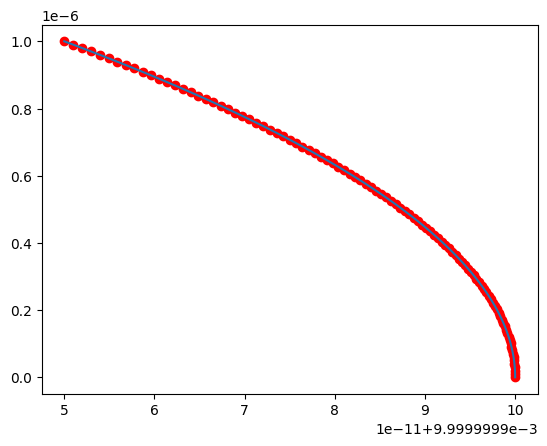

In [79]:
# small angle (from 0 to 1 / 10000). we divide by a big to not make a global turn around the circle (to attain not the 
# angle of 2pi)
small_angles = np.linspace(0, 1 / 10000, 100) # 1 / 10000 

# recalculate the points
points = euler(c, small_angles)

# trace the points
plt.plot(np.real(points), np.imag(points))

plt.scatter(np.real(points), np.imag(points), color = "red")


We see now that the points taken are minor (since we are taking small movements around the circle) but different from each other. 

However, now let us talk about the points of our positional vectors. We calculate them by taking natural and imaginary parts of our Euler formula. However, we cannot directly use the complex number that we obtain. However, since we are dealing with multiple dimensions and tracing circles, we must try to distribute multiple positions over the embedding vector. To make that possible, for each group of 2 dimensions, in the embedding dimension, we will add them to the two points of the next point of our circle. Let us make another example to explain this.

Let us say we have the following embedding vector:

In [83]:
embedding_vector = np.array([0.3, 0.5, 0.3, 0.2, 0.2, 0.9])

With six dimensions, we will attribute a point of the positional vector for every two dimensions.

Then, we create the following 3 points of our positional vector because the max angle equals 1/10000.

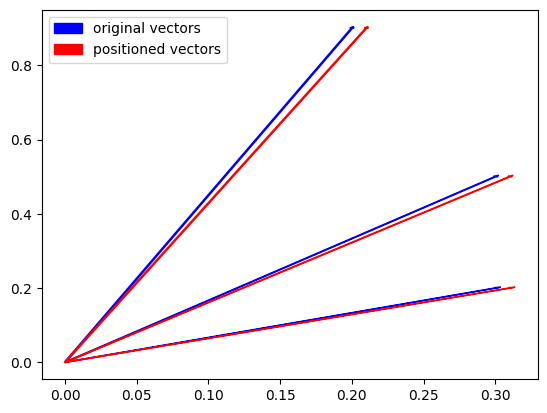

In [92]:
# we create the different on the circle
pos_points = euler(c, np.linspace(0, 1 / 10000, 3))

# we will then make a movement for each group of two dimensions (point) in our embedding vector !!
xcoords = np.real(pos_points) # the x axis coordinate
ycoords = np.imag(pos_points) # the y axis coordinate

point1 = (xcoords[0] + embedding_vector[0], ycoords[0] + embedding_vector[1]) # for the two first dimensions

point2 = (xcoords[1] + embedding_vector[2], ycoords[1] + embedding_vector[3]) # for the next two dimensions

point3 = (xcoords[2] + embedding_vector[4], ycoords[2] + embedding_vector[5]) # for the next two dimensions

# Then we obtain the following new vectors
plt.arrow(0, 0,
    embedding_vector[0],
    embedding_vector[1], width = 0.001, color = "blue", label = "original vectors"
    )
plt.arrow(0, 0,
    embedding_vector[2],
    embedding_vector[3], width = 0.001, color = "blue",
    )
plt.arrow(0, 0,
    embedding_vector[4],
    embedding_vector[5], width = 0.001, color = "blue"
    )

plt.arrow(0, 0,
    point1[0],
    point1[1], width = 0.001, color = "red", label = "positioned vectors"
    )

plt.arrow(0, 0,
    point2[0],
    point2[1], width = 0.001, color = "red"
    )

plt.arrow(0, 0,
    point3[0],
    point3[1], width = 0.001, color = "red"
    )

plt.legend(loc = "upper left")


We obtain, after modification, the red vectors.

**Important**: We will generally obtain different values for each embedding vector, then the different vectors will not have the same positions after adding them with the positional vector.

The angle of a point on the circle will be equal to $angle(pos, i) = \frac{pos}{10000^{i / 512}}$ where $i$ is the index of the positional vector point and $pos$ is the position of a token in a sequence.

To understand why we use $pos$, here is the angle calculation. Let us re-trace the positional vector embedding points for four consecutive positions.

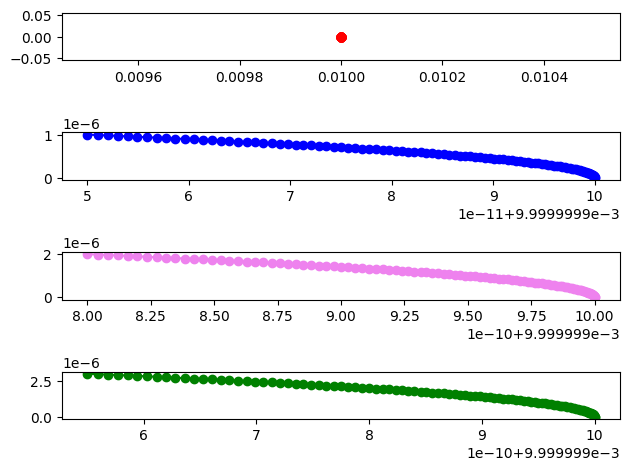

In [113]:
# small angle (from 0 to 1 / 10000) and multiply by a position to change the slope (something like this). The positions
# begin at 0
small_angles = np.linspace(0, 1 / 10000, 100)

small_angles_pos1 = small_angles* 0 # pos = 0

small_angles_pos2 = small_angles * 1 # pos = 1

small_angles_pos3 = small_angles * 2 # pos = 3
 
small_angles_pos4 = small_angles * 3 # pos = 4

# calculate the points
points1 = euler(c, small_angles_pos1)

points2 = euler(c, small_angles_pos2)

points3 = euler(c, small_angles_pos3)

points4 = euler(c, small_angles_pos4)

# trace the points
plt.subplot(4, 1, 1)
plt.plot(np.real(points1), np.imag(points1), color = "red")

plt.scatter(np.real(points1), np.imag(points1), color = "red")

plt.subplot(4, 1, 2)
plt.plot(np.real(points2), np.imag(points2), color = "blue")

plt.scatter(np.real(points2), np.imag(points2), color = "blue")

plt.subplot(4, 1, 3)
plt.plot(np.real(points3), np.imag(points3), color = "violet")

plt.scatter(np.real(points3), np.imag(points3), color = "violet")

plt.subplot(4, 1, 4)
plt.plot(np.real(points4), np.imag(points4), color = "green")

plt.scatter(np.real(points4), np.imag(points4), color = "green")
plt.tight_layout()

We can see that the x-axis and y-axis change at each new position. They will remain to be 0 and 1 for the position, and at each new position, we change the distances between the different points. We will see more clearly that modification between the angles with a whole circle.

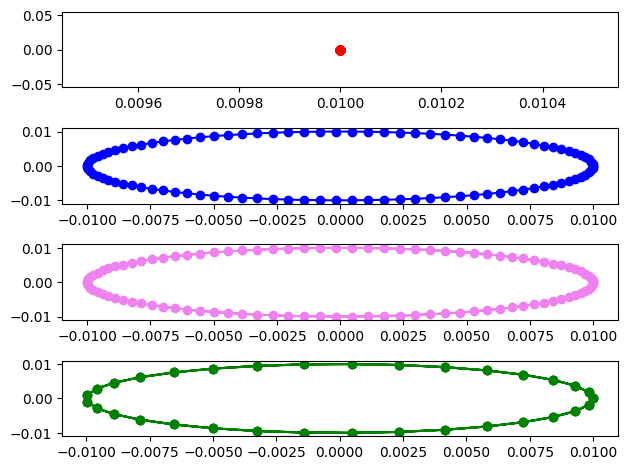

In [112]:
# small angle (from 0 to 1 / 10000) and multiply by a position to change the slope (something like this). The positions
# begin at 0
small_angles = np.linspace(0, 2 * np.pi, 100)

small_angles_pos1 =  small_angles* 0 # pos = 0

small_angles_pos2 = small_angles * 1 # pos = 1

small_angles_pos3 = small_angles * 2 # pos = 2
 
small_angles_pos4 = small_angles * 3 # pos = 3

# calculate the points
points1 = euler(c, small_angles_pos1)

points2 = euler(c, small_angles_pos2)

points3 = euler(c, small_angles_pos3)

points4 = euler(c, small_angles_pos4)

# trace the points
plt.subplot(4, 1, 1)
plt.plot(np.real(points1), np.imag(points1), color = "red")

plt.scatter(np.real(points1), np.imag(points1), color = "red")

plt.subplot(4, 1, 2)
plt.plot(np.real(points2), np.imag(points2), color = "blue")

plt.scatter(np.real(points2), np.imag(points2), color = "blue")

plt.subplot(4, 1, 3)
plt.plot(np.real(points3), np.imag(points3), color = "violet")

plt.scatter(np.real(points3), np.imag(points3), color = "violet")

plt.subplot(4, 1, 4)
plt.plot(np.real(points4), np.imag(points4), color = "green")

plt.scatter(np.real(points4), np.imag(points4), color = "green")
plt.tight_layout()

We can see that the x-axis and y-axis change at each new position. The axes will remain 0 and 1 for the position, and at each new position, we change the distances between the different points. We will see more clearly that modification between the angles with a whole circle.

Let us trace a heatmap of all possible values the positional vector can take for an embedding vector of 512 dimensions and a sequence of 100 tokens.

In [114]:
from functools import partial

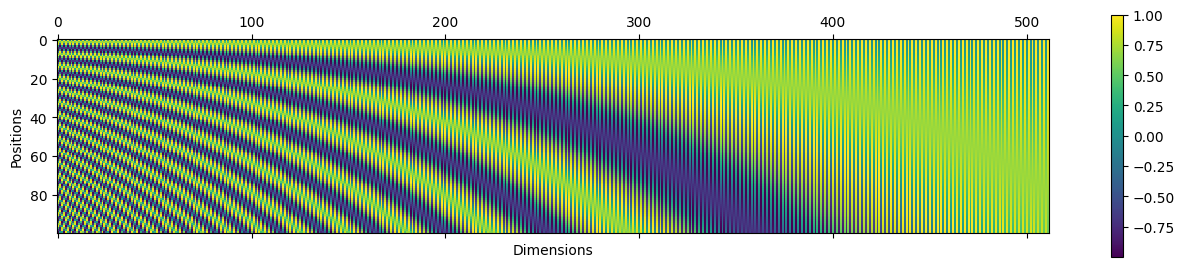

In [129]:
# the angle is calculated as following
angle = lambda pos, i: pos / 10000 ** (i / 512)

# let's initialize the different token positions
poses = np.arange(0, 100)

# let's initialize also the different dimension indexes
dims = np.arange(0, 512)

# let's initialize the index of the different positional vector values
circle_index = np.arange(0, 512 / 2)

# let's create the possible combinations between a position and a dimension index
xv, yv = np.meshgrid(poses, circle_index)

# let's create a matrix which will contain all the different points initialized
points = np.zeros((poses.size, dims.size))

# let's calculate the circle y axis coordinates
points[:, ::2] = np.sin(angle(xv.T, yv.T))

# let's calculate the circle x axis coordinates
points[:, 1::2] = np.cos(angle(xv.T, yv.T))

# let's trace the heatmap
plt.matshow(points)

plt.xlabel("Dimensions")

plt.ylabel("Positions")

plt.colorbar()

Then we can use this matrix to position an embedding vector in the positional space.

In [130]:
# let's recuperate the positional vector value in the position 40 and dimension 300
points[29, 299]

-0.40486708680251937

These transformations can finally be added to our embedding vector before being fed into the multi-head attention network.